In [29]:
%run package_import.ipynb
%run data_profiling.ipynb
%run data_transformation.ipynb

### Question 1
**Can you describe the vibe of each Seattle neighborhood using listing descriptions?**

**Read listing data**

In [6]:
df_listings = pd.read_sql_query(

'''
select 
    name,  
    space,
    description, 
    neighborhood_overview,  
    notes,  
    host_location,  
    host_is_superhost,
    host_neighbourhood,  
    neighbourhood,  
    neighbourhood_cleansed,
    neighbourhood_group_cleansed,
    property_type,  
    room_type,  
    accommodates,
    bathrooms,  
    beds,
    bed_type,
    amenities,  
    price,  
    weekly_price,
    monthly_price,  
    review_scores_rating,  
    review_scores_accuracy
from raw_listings
where price <> 0
and review_scores_rating is not null
and neighbourhood is not null
'''
,sqlEngine)



In [7]:
df_listings.head()

,name,space,description,neighborhood_overview,notes,host_location,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,review_scores_rating,review_scores_accuracy
0,Stylish Queen Anne Apartment,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west sid...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west sid...",None,None,"Seattle, Washington, United States",f,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Frien...",85.0,0.0,0.0,95.0,10.0
1,Bright & Airy Queen Anne Apartment,"Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section ...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like car...","Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for...",What's up with the free pillows? Our home was renovated and restored with health & safety in mi...,"Seattle, Washington, United States",t,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",H...",150.0,1000.0,3000.0,96.0,10.0
2,New Modern House-Amazing water view,"Our house is modern, light and fresh with a warm simple palette accented with barnwood, steel an...","New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and loun...","Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the...","Our house is located just 5 short blocks to Top Pot Doughnuts, Tribunali pizza, Caffe Fiore, Tra...","Seattle, Washington, United States",f,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,11,4.5,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises...",975.0,0.0,0.0,97.0,10.0
3,Charming craftsman 3 bdm house,"Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedroo...","Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedroo...",We are in the beautiful neighborhood of Queen Anne on 14th Ave. W. A 5 minute walk from Whole Fo...,Belltown,"Seattle, Washington, United States",f,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detecto...",450.0,0.0,0.0,92.0,9.0
4,Private unit in a 1920s mansion,"If you include a bit of your background in your housing request, you'll get a better chance to h...",We're renting out a small private unit of one of Seattle's most beautiful houses to creative tra...,This part of Queen Anne has wonderful views and quiet streets with parking. There are several b...,Let me know if you need anything or have suggestions to improve guest stays.,"Seattle, Washington, United States",f,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,House,Private room,2,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises"",Heating,""Smoke Detector"",Essentials,Shampoo}",120.0,800.0,0.0,95.0,10.0


In [25]:
df_listings_groupby = df_listings.groupby(['neighbourhood_cleansed','review_scores_accuracy'],as_index=False).agg(
    median_review_rating=pd.NamedAgg(column="review_scores_rating", aggfunc="median"),
    avg_review_rating=pd.NamedAgg(column="review_scores_rating", aggfunc="mean"),
    min_review_rating=pd.NamedAgg(column="review_scores_rating", aggfunc="min"),
    max_review_rating=pd.NamedAgg(column="review_scores_rating", aggfunc="max")
).sort_values(by='avg_review_rating',ascending=False)

In [26]:
df_listings_groupby.head()

,neighbourhood_cleansed,review_scores_accuracy,median_review_rating,avg_review_rating,min_review_rating,max_review_rating
132,North Admiral,8.0,100.0,100.0,100.0,100.0
5,Arbor Heights,9.0,100.0,100.0,100.0,100.0
7,Atlantic,6.0,100.0,100.0,100.0,100.0
221,Westlake,9.0,100.0,100.0,100.0,100.0
222,Westlake,10.0,100.0,99.6,98.0,100.0


<AxesSubplot:xlabel='min_review_rating', ylabel='max_review_rating'>

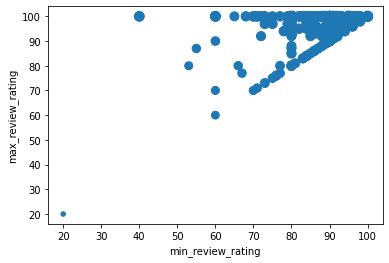

In [27]:
df_listings_groupby.plot.scatter(
    x='min_review_rating',  
    y='max_review_rating',  
    s='avg_review_rating'
    )

In [31]:
df_listings.loc[
    df_listings['neighborhood_overview'].notna(),
    ['neighbourhood', 'neighborhood_overview']
    ].head()

,neighbourhood,neighborhood_overview
1,Queen Anne,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound."
2,Queen Anne,"Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes. The ""main drag"" is Queen Anne Ave. with a great selection of boutiques, restaurants, coffee shops and bars. Upper Queen Anne is just 1.5 miles from downtown Seattle, and situated on a hilltop with stunning panoramic views in every direction -- downtown Seattle, the Space Needle and Mt. Rainier to the southeast, Elliott Bay to the southwest, the Olympic Mountains to the west and the Cascade Mountains to the east. If you're a walker, you'll love the 4-mile ""Crown of Queen Anne"" loop which takes in all of these views!"
3,Queen Anne,"We are in the beautiful neighborhood of Queen Anne on 14th Ave. W. A 5 minute walk from Whole Foods Market. Take a 5 minute drive south or north and find yourself in the lively neighborhood of Belltown or charming neighborhood of Ballard (respectively). Upper Queen Anne shops and restaurants are a 20 minute walk or a quick 5 minute drive up the hill. The Seattle Center (The Space Needle, the Children's Museum, EMP, Pacific Science Center, Chihuly Garden and Glass) is a 7 minute drive."
4,Queen Anne,This part of Queen Anne has wonderful views and quiet streets with parking. There are several beautiful places to walk nearby.
5,Queen Anne,"Close restaurants, coffee shops and grocery stores all in easy walking distance from our house."


In [10]:
df_list_neighbourhood = df_list.groupby(by=['neighbourhood_group_cleansed', 'property_type'], as_index=False).agg({'price':np.median, 'review_scores_rating':np.median})
df_list_neighbourhood.columns = ['neighbourhood', 'property_type', 'price', 'review_scores_rating']

In [171]:
df_list_neighbourhood.head()

,neighbourhood,property_type,price,review_scores_rating
0,Alki,Apartment,103.750000,95.250000
1,Alki,House,203.300000,97.000000
2,Alki,Townhouse,250.000000,88.000000
3,Arbor Heights,House,118.000000,98.000000
4,Atlantic,Apartment,84.545455,94.181818


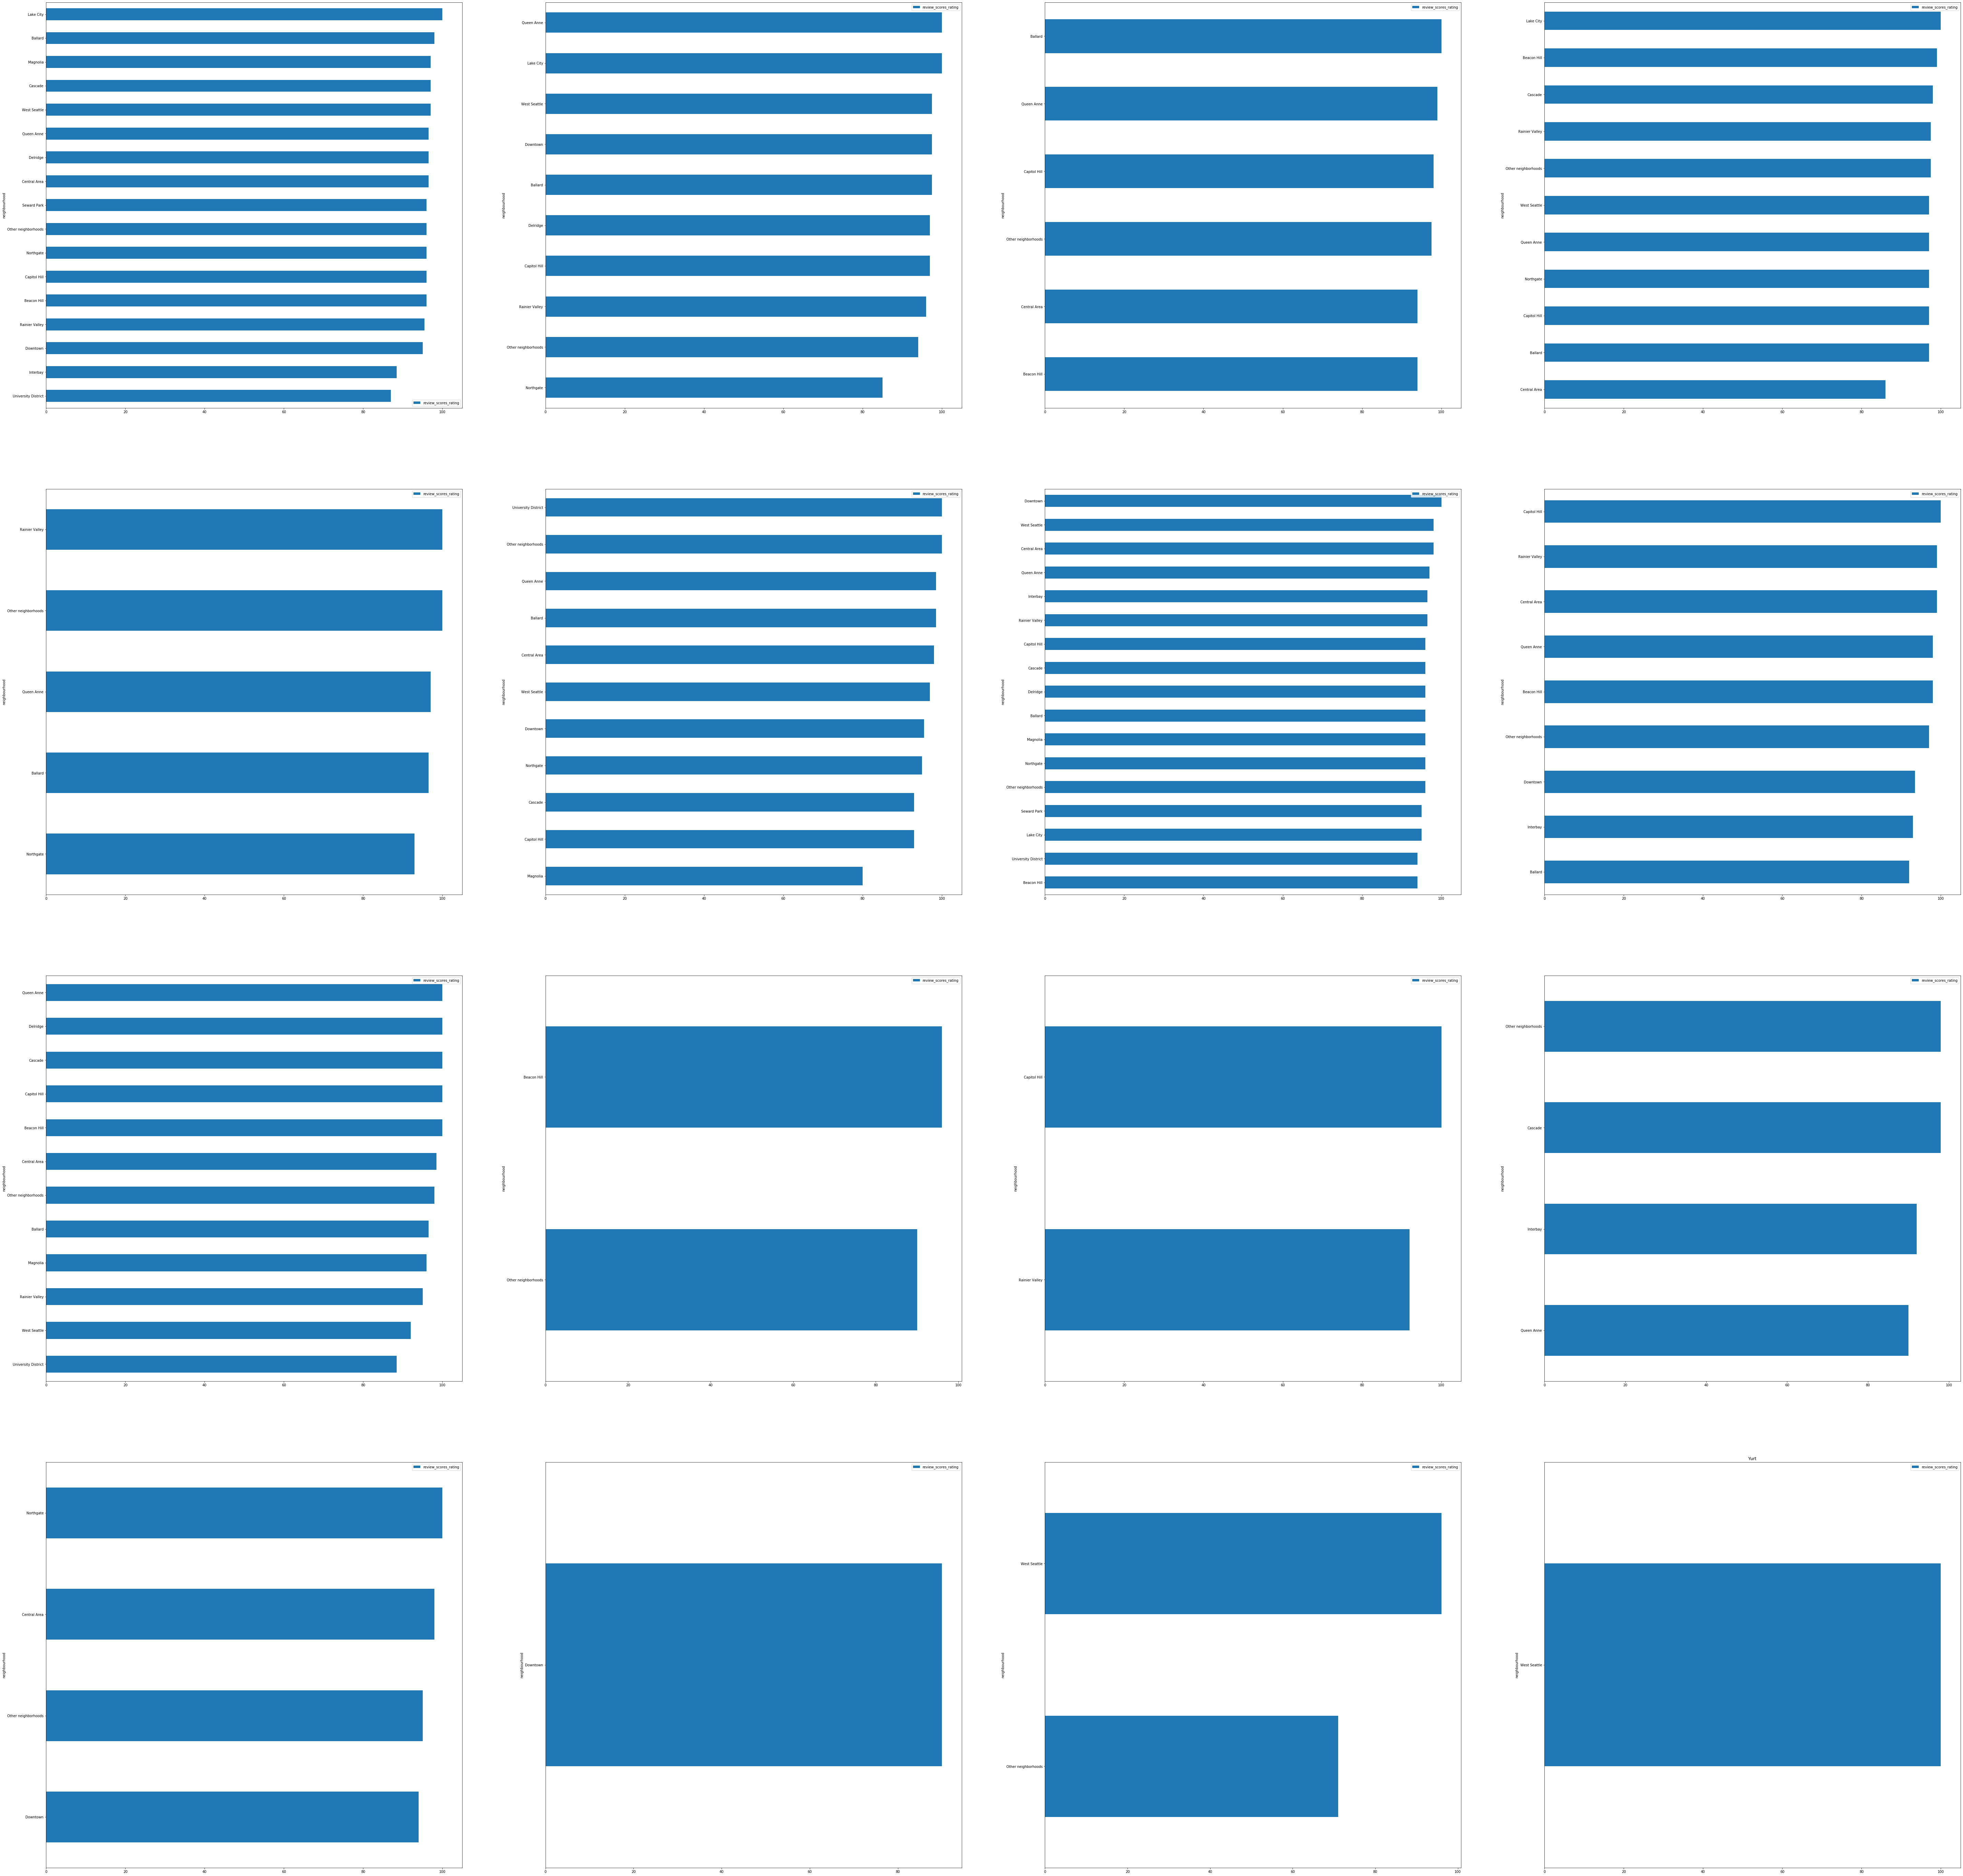

In [12]:
cols = 4
# rows: numbers of rows of boxplots
# number of columns to be checked with outliers
n_property_type = len(df_list_neighbourhood['property_type'].unique())

# determine number of rows of boxplot
# for example, there are 29 boxplots to be created. 
# to determine number of rows, use 29 divided by 4 to get 7.25 rows 
# It means that rows are more than 7 and so rows are set as 8. 
if n_property_type/cols > n_property_type//cols:
    rows = n_property_type//cols + 1
else:
    rows = n_property_type//cols

# set subplots to create multiple boxplot
# figsize set for size of boxplots
fig, axes = plt.subplots(rows,cols, figsize=(100,100))

# loop each column to create each boxplot
for index, value in enumerate(list(df_list_neighbourhood['property_type'].unique())):
    #remove NaN value from each column
    plt.title(value)
    df_outlier = df_list_neighbourhood[df_list_neighbourhood['property_type'] == value].sort_values(by='review_scores_rating', ascending=True)
    df_outlier.plot.barh(x='neighbourhood' , y = 'review_scores_rating',ax=axes.flatten()[index])
    
# show all boxplots
# plt.show()
plt.savefig('bar chart.png')

TypeError: inner() got multiple values for argument 'ax'

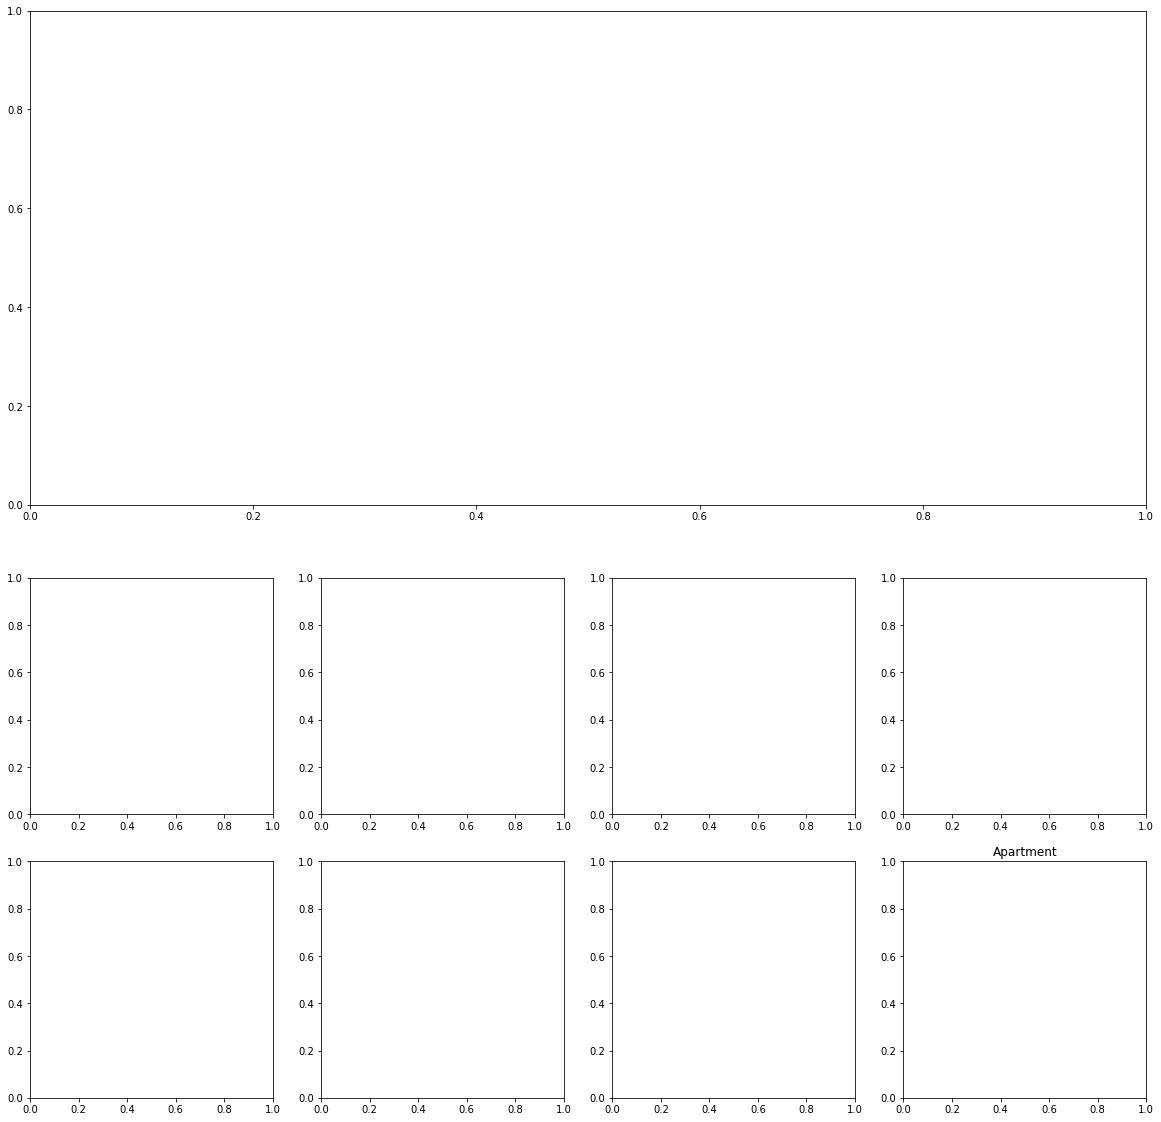

In [175]:
cols = 4
# rows: numbers of rows of boxplots
# number of columns to be checked with outliers
n_property_type = len(df_list_neighbourhood['property_type'].unique())

# determine number of rows of boxplot
# for example, there are 29 boxplots to be created. 
# to determine number of rows, use 29 divided by 4 to get 7.25 rows 
# It means that rows are more than 7 and so rows are set as 8. 
if n_property_type/cols > n_property_type//cols:
    rows = n_property_type//cols + 1
else:
    rows = n_property_type//cols

# set subplots to create multiple boxplot
# figsize set for size of boxplots
fig, axes = plt.subplots(rows,cols, figsize=(20,20))

# loop each column to create each boxplot
for index, value in enumerate(list(df_list_neighbourhood['property_type'].unique())):
    #remove NaN value from each column
    plt.title(value)
    labels = df_list_neighbourhood.loc[df_list_neighbourhood['property_type'] == value,'neighbourhood'].to_list()
    price =  df_list_neighbourhood.loc[df_list_neighbourhood['property_type'] == value,'price'].to_list()
    ax.barh(labels, price,ax=axes.flatten()[index])
#     df_outlier = df_list_neighbourhood[df_list_neighbourhood['property_type'] == value].sort_values(by='price', ascending=True)
#     df_outlier.plot.barh(x='neighbourhood' , y = 'price',ax=axes.flatten()[index])
    
# show all boxplots
plt.show()

In [155]:
df_list_neighbourhood.dtypes

neighbourhood            object
property_type            object
price                   float64
review_scores_rating    float64
dtype: object

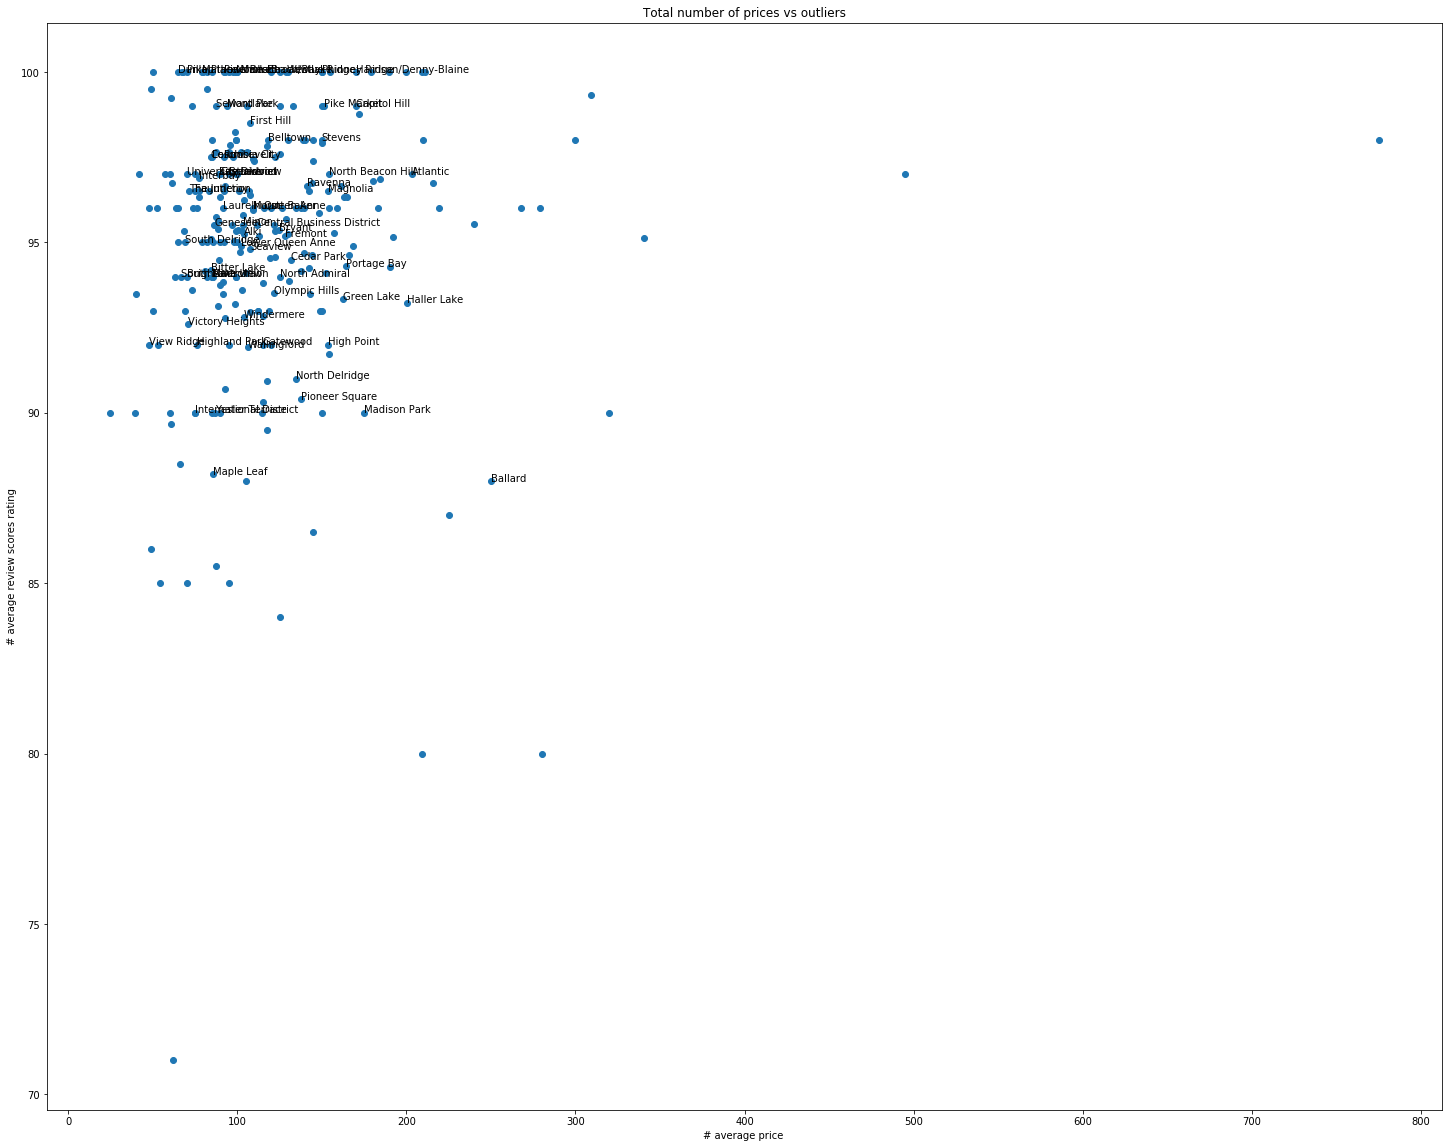

In [147]:
x = df_list_neighbourhood['price']
y = df_list_neighbourhood['review_scores_rating']
text = df_list_neighbourhood.loc[df_list_neighbourhood['property_type'] == 'Apartment', 'neighbourhood']

fig, ax = plt.subplots(figsize=(25,20))
scatter = ax.scatter(x, y)
plt.title('Total number of prices vs outliers')
plt.xlabel('# average price ')
plt.ylabel('# average review scores rating')

# plt.legend('neighbourhood')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

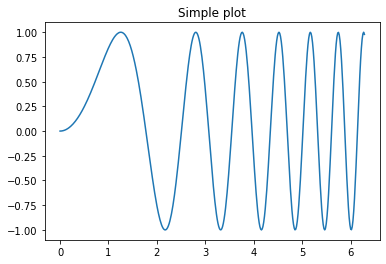

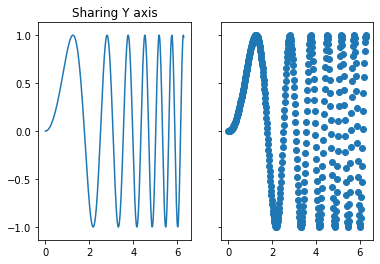

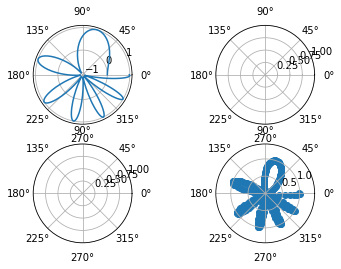

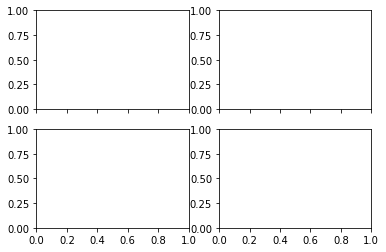

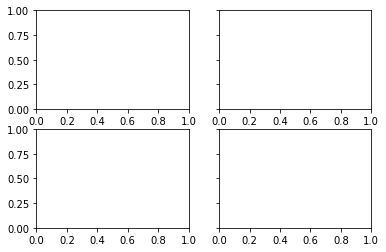

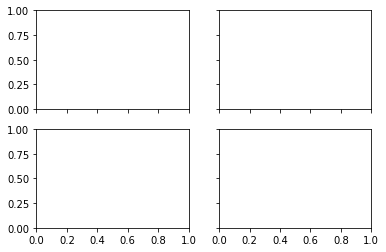

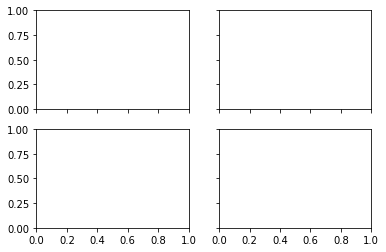

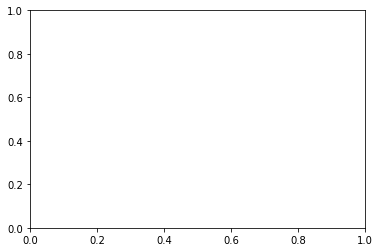

In [176]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)